# Tarea 1

In [ ]:
import nltk
import time
from random import shuffle
from copy import copy
nltk.download('cess_esp')
from nltk.corpus import cess_esp # Descargar corpus
from nltk.tag import hmm
from nltk.tag import tnt
start = time.time()
corpus_sentences = cess_esp.tagged_sents() # Lista de listas del corpus
number_sentences=len(corpus_sentences)
print('number sentences:', number_sentences)
print('number words:', end=" ")
nw = 0
for s in range(len(corpus_sentences)):
  nw= nw + len(corpus_sentences[s])
print(nw)
print('')
# Procesar corpus y simplificar las categorías
corpus_limpio = []
corpus_original = list(corpus_sentences)
for lista in corpus_sentences: # lista de listas de tuplas
  # enumerate(lista) en la cabecera del for tenemos el indice de 0 a n y la tupla, que es lo que hay en la lista
  indexBorrar = []
  for index, tupla in enumerate(lista): # lista de listas de tuplas, dentro de cada tupla, lo primero es la palabra seguido de la categoría
    palabra, categoria = tupla # Python acutomaticamente asigna el primer elemento de la tupla a palabra, y el segundo a categoria
    if palabra == '*0*': # Eliminar estas palabras del corpus
      indexBorrar.append(index) # Guardo los índices a borrar para borrarlos luego de forma segura
      continue
    elif len(categoria) == 1: # Las categorías de longitud 1 no se tocan
      continue
    elif categoria.startswith('v') or categoria.startswith('F'): # verbos y signos de puntuación conservan 3 primeras letras
      tupla = (palabra, categoria[:3])
    else: # El resto, 2 primeras letras
      tupla = (palabra, categoria[:2])
    lista[index] = tupla
  for x in sorted(indexBorrar, reverse=True): # Borramos las palabras en los índices seleccionados
    del lista[x]
  corpus_limpio.append(lista)

corpus_limpio_barajado = corpus_limpio.copy()
corpus_original_barajado = corpus_original.copy()
shuffle(corpus_limpio_barajado)
shuffle(corpus_original_barajado)
end = time.time()
print(end - start)

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
number sentences: 6030
number words: 192685

25.772756099700928


In [ ]:
start = time.time()
# Corpus Original Barajando HMM Cross validation
tamaño = int(len(corpus_original_barajado)/10)
resultados1 = []
for i in range(10):
  entrenamiento = corpus_original_barajado[:tamaño*i] + corpus_original_barajado[tamaño*i + tamaño:]
  test = corpus_original_barajado[tamaño*i: tamaño*i + tamaño]
  tagger_hmm = hmm.HiddenMarkovModelTagger.train(entrenamiento)
  resultados1.append(tagger_hmm.evaluate(test))
print(resultados1) 
end = time.time()
print(end - start)

KeyboardInterrupt: ignored

In [ ]:
# Corpus Reducido Barajando HMM Cross validation
tamaño = int(len(corpus_limpio_barajado)/10)
resultados2 = []
for i in range(10):
  entrenamiento = corpus_limpio_barajado[:tamaño*i] + corpus_limpio_barajado[tamaño*i + tamaño:]
  test = corpus_limpio_barajado[tamaño*i: tamaño*i + tamaño]
  tagger_hmm = hmm.HiddenMarkovModelTagger.train(entrenamiento)
  resultados2.append(tagger_hmm.evaluate(test))
print(resultados2) 

[0.9293604039553965, 0.9245978895604958, 0.9266211604095563, 0.92515469464622, 0.9265806988352745, 0.9267236828212438, 0.9251538298323785, 0.9267222465993857, 0.9242314083921894, 0.923384550620922]


In [ ]:
# 95% de confianza, sabiendo que son proporciones
import math
def calcularErrores(x):
  errores = [None] * len(x)
  for i in range(len(x)):
    errores[i] = 1.96*math.sqrt(x[i]*(1-x[i]) /tamaño) 
  return errores

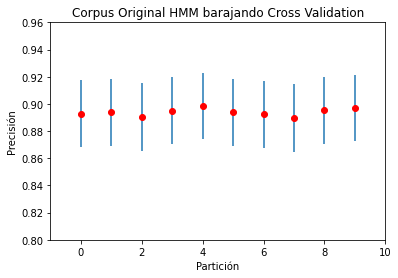

In [ ]:
# Corpus Original Barajando HMM Cross validation
import matplotlib.pyplot as plt
import statistics
x = [i for i in range(10)]
y = resultados1
errores = calcularErrores(y)
plt.axis([-1, 10, 0.80, 0.96])
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.title('Corpus Original HMM barajando Cross Validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=errores,linestyle='None')
plt.show()

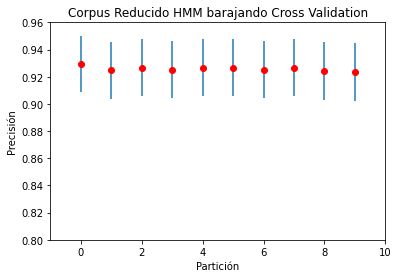

In [ ]:
# Corpus Reducido Barajando HMM Cross validation
import matplotlib.pyplot as plt
import statistics
x = [i for i in range(10)]
y = resultados2
errores = calcularErrores(y)
plt.axis([-1, 10, 0.80, 0.96])
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.title('Corpus Reducido HMM barajando Cross Validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=errores,linestyle='None')
plt.show()

In [ ]:
print('Corpus Original HMM barajando')
print('Partición - Precisión - Intervalo de confianza')
errores1 = calcularErrores(resultados1)
for i in range(10):
  media = resultados1[i]
  error = errores1[i]
  print('   ',i, '       ',round(media,3), '     (',round(media-error,3) ,'-' ,round(media+error,3),')')

Corpus Original HMM barajando
Partición - Precisión - Intervalo de confianza
    0         0.893      ( 0.868 - 0.918 )
    1         0.894      ( 0.869 - 0.918 )
    2         0.891      ( 0.866 - 0.916 )
    3         0.895      ( 0.871 - 0.92 )
    4         0.898      ( 0.874 - 0.922 )
    5         0.894      ( 0.869 - 0.918 )
    6         0.892      ( 0.868 - 0.917 )
    7         0.89      ( 0.865 - 0.915 )
    8         0.895      ( 0.871 - 0.92 )
    9         0.897      ( 0.873 - 0.921 )


In [ ]:
print('Corpus Reducido HMM barajando')
print('Partición - Precisión - Intervalo de confianza')
errores2 = calcularErrores(resultados2)
for i in range(10):
  media = resultados2[i]
  error = errores2[i]
  print('   ',i, '       ',round(media,3), '     (',round(media-error,3) ,'-' ,round(media+error,3),')')

Corpus Reducido HMM barajando
Partición - Precisión - Intervalo de confianza
    0         0.929      ( 0.909 - 0.95 )
    1         0.925      ( 0.904 - 0.946 )
    2         0.927      ( 0.906 - 0.947 )
    3         0.925      ( 0.904 - 0.946 )
    4         0.927      ( 0.906 - 0.947 )
    5         0.927      ( 0.906 - 0.948 )
    6         0.925      ( 0.904 - 0.946 )
    7         0.927      ( 0.906 - 0.948 )
    8         0.924      ( 0.903 - 0.945 )
    9         0.923      ( 0.902 - 0.945 )


# Tarea 2

In [ ]:
# Corpus Reducido barajado HMM variando cantidad de entrenamiento
tamaño = int(len(corpus_limpio_barajado)/10)
resultados3 = []
test = corpus_limpio_barajado[tamaño*9:]
for i in range(9):
  entrenamiento = corpus_limpio_barajado[:tamaño*(i+1)]
  tagger_hmm = hmm.HiddenMarkovModelTagger.train(entrenamiento)
  resultados3.append(tagger_hmm.evaluate(test))
print(resultados3) 

[0.845407467974925, 0.874897792313982, 0.8914690651403652, 0.9028618152085037, 0.9094576178795312, 0.9162714636140638, 0.9219950940310712, 0.926573998364677, 0.9294630689561189]


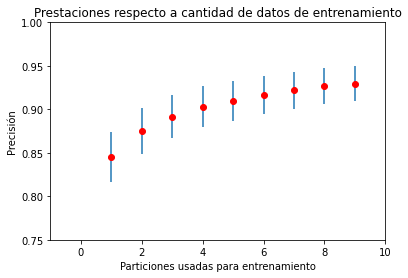

In [ ]:
# Corpus Reducido sin barajar HMM variando cantidad de entrenamiento
import matplotlib.pyplot as plt
import statistics
x = [i+1 for i in range(9)]
y = resultados3
errores = calcularErrores(y)
plt.axis([-1, 10, 0.75, 1])
plt.ylabel('Precisión')
plt.xlabel('Particiones usadas para entrenamiento')
plt.title('Prestaciones respecto a cantidad de datos de entrenamiento')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=errores,linestyle='None')
plt.show()

In [ ]:
print('Evaluación de prestaciones respecto a cantidad de datos de entrenamiento')
print('Particiones usadas - Precisión - Intervalo de confianza')
errores3 = calcularErrores(resultados3)
for i in range(9):
  media = resultados3[i]
  error = errores3[i]
  print('       ',i+1, '            ',round(media,3), '     (',round(media-error,3) ,'-' ,round(media+error,3),')')

Evaluación de prestaciones respecto a cantidad de datos de entrenamiento
Particiones usadas - Precisión - Intervalo de confianza
        1              0.845      ( 0.817 - 0.874 )
        2              0.875      ( 0.848 - 0.901 )
        3              0.891      ( 0.867 - 0.916 )
        4              0.903      ( 0.879 - 0.926 )
        5              0.909      ( 0.887 - 0.932 )
        6              0.916      ( 0.894 - 0.938 )
        7              0.922      ( 0.901 - 0.943 )
        8              0.927      ( 0.906 - 0.947 )
        9              0.929      ( 0.909 - 0.95 )


# Tarea 3

In [ ]:
# Corpus reducido barajado TnT, distintos tamaños de sufijos para palabras desconocidas
from nltk.tag import AffixTagger
tamaño = int(len(corpus_limpio_barajado)/10)
resultados4 = []
test = corpus_limpio_barajado[tamaño*9:]
entrenamiento = corpus_limpio_barajado[:tamaño*9]
for i in range(7):
  sufix_tagger = AffixTagger(entrenamiento, affix_length=-i)
  tagger_tnt = tnt.TnT(N=100, unk=sufix_tagger, Trained=True)
  tagger_tnt.train(entrenamiento)
  resultados4.append(tagger_tnt.evaluate(test))
print(resultados4) 

[0.8986529151757525, 0.929330667227952, 0.939275941906967, 0.94832666806988, 0.9456430225215744, 0.9365922963586614, 0.92527888865502]


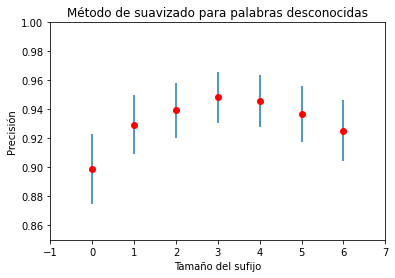

In [ ]:
# Corpus reducido barajado TnT, distintos tamaños de sufijos para palabras desconocidas
import matplotlib.pyplot as plt
import statistics
x = [i for i in range(7)]
y = resultados4
errores = calcularErrores(y)
plt.axis([-1, 7, 0.85, 1])
plt.ylabel('Precisión')
plt.xlabel('Tamaño del sufijo')
plt.title('Método de suavizado para palabras desconocidas')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=errores,linestyle='None')
plt.show()

In [ ]:
print('Evaluación de prestaciones respecto a método de suavizado para palabras desconocidas')
print('Tamaño sufijo - Precisión - Intervalo de confianza')
errores4 = calcularErrores(resultados4)
for i in range(7):
  media = resultados4[i]
  error = errores4[i]
  print('     ',i, '       ',round(media,3), '     (',round(media-error,3) ,'-' ,round(media+error,3),')')

Evaluación de prestaciones respecto a método de suavizado para palabras desconocidas
Tamaño sufijo - Precisión - Intervalo de confianza
      0         0.899      ( 0.875 - 0.923 )
      1         0.929      ( 0.909 - 0.95 )
      2         0.939      ( 0.92 - 0.958 )
      3         0.948      ( 0.931 - 0.966 )
      4         0.946      ( 0.928 - 0.964 )
      5         0.937      ( 0.917 - 0.956 )
      6         0.925      ( 0.904 - 0.946 )


# Tarea 4

In [ ]:
start = time.time()
from nltk.tag import UnigramTagger, brill, brill_trainer
# Etiquetador Brill con etiquetado inicial Unigram Tagger
tamaño = int(len(corpus_limpio_barajado)/10)
test = corpus_limpio_barajado[tamaño*9:]
entrenamiento = corpus_limpio_barajado[:tamaño*9]
unigramTagger = UnigramTagger(entrenamiento)
brill.Template._cleartemplates()
templates = brill.fntbl37()
tagger = nltk.tag.brill_trainer.BrillTaggerTrainer(initial_tagger=unigramTagger, templates=templates, trace=3, deterministic=True).train(entrenamiento)
resultadoBrillUni = tagger.evaluate(test)
print(resultadoBrillUni)
end = time.time()
print(end - start)

TBL train (fast) (seqs: 5427; tokens: 169996; tpls: 37; min score: 2; min acc: None)
Finding initial useful rules...
    Found 106831 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
10601194 134   0  | pr->cs if Pos:vmi@[-3,-2,-1]
 233 245  12   0  | da->pp if Pos:vmi@[1]
 197 288  91   0  | pr->cs if Word:que@[0] & Pos:sp@[-1]
 164 331 167  13  | nc->aq if Pos:nc@[-1]
 106 130  24   0  | pr->cs if Pos:vai@[-3,-2,-1]
  94 104  10   0  | aq->vmp if Pos:vai@[-1]
  91 139  48   1  | pr->cs if Pos:rg@[-2,-1]
  87 104  17  10  | di->pi if Pos:sp@[1]
  69  70   1   0  | pr->cs if Word:que@[0] & Pos:vmn@[-1]
  60  60   0   0  | pr->cs if Word

In [ ]:
# Etiquetador Brill con etiquetado inicial hmm
start = time.time()
tamaño = int(len(corpus_limpio_barajado)/10)
test = corpus_limpio_barajado[tamaño*9:]
entrenamiento = corpus_limpio_barajado[:tamaño*9]
tagger_hmm = hmm.HiddenMarkovModelTagger.train(entrenamiento)
brill.Template._cleartemplates()
templates = brill.fntbl37()
tagger = nltk.tag.brill_trainer.BrillTaggerTrainer(initial_tagger=tagger_hmm, templates=templates, trace=3, deterministic=True).train(entrenamiento)
#tagger = nltk.tag.brill_trainer.BrillTaggerTrainer(initial_tagger=unigramTagger).train(entrenamiento)
resultadoBrillHmm = tagger.evaluate(test)
print(resultadoBrillHmm)
end = time.time()
print(end - start)

TBL train (fast) (seqs: 5427; tokens: 169996; tpls: 37; min score: 2; min acc: None)
Finding initial useful rules...
    Found 131222 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  68  78  10   0  | sp->cs if Word:como@[0]
  31  62  31  52  | Fg->nc if Pos:Fg@[-1] & Pos:Fg@[1]
  31  31   0   0  | nc->Fg if Word:-@[0]
  27  30   3   0  | pr->cs if Word:que@[0] & Word:de@[-1]
  23  29   6   0  | cs->pr if Pos:sp@[1] & Word:que@[0] & Word:,@[-1]
  21  21   0  10  | da->aq if Word:del@[-1]
  16  26  10   0  | rg->cc if Word:Sin_embargo@[0] & Word:,@[1]
  16  27  11   0  | pr->cs if Pos:p0@[1] & Pos:vms@[2]
  15  15   0   0  | cs->pr if 

In [ ]:
import time
start = time.time()
# Etiquetador CRF
from nltk.tag import CRFTagger
import pycrfsuite
import sklearn_crfsuite
tamaño = int(len(corpus_limpio_barajado)/10)
test = corpus_limpio_barajado[tamaño*9:]
entrenamiento = corpus_limpio_barajado[:tamaño*9]
crf = nltk.tag.CRFTagger()
crf.train(entrenamiento,'model.crf.tagger')
resultadoCRF = crf.evaluate(test) 
print(resultadoCRF)
end = time.time()
print(end - start)

0.956373969244484
319.47178411483765


In [ ]:
 !pip install sklearn-pycrfsuite
 !pip install python-crfsuite

     |████████████████████████████████| 485 kB 16.2 MB/s 
  Created wheel for sklearn-pycrfsuite: filename=sklearn_pycrfsuite-0.4.0-py2.py3-none-any.whl size=11001 sha256=e080a53988fd8c19fe82bb1b1fda0ef8050332ee5be45a3ee1094ccddf5678bb
  Stored in directory: /root/.cache/pip/wheels/44/50/b1/295e502c6652f551dc99bfdb394a3fe2fcb47668e333391f38
  Created wheel for python-crfsuite-extension: filename=python_crfsuite_extension-0.9.7-cp37-cp37m-linux_x86_64.whl size=776956 sha256=ea466fee966c78f78abea1ea934629f820507ebe0554857274927e1f4ae95ae4
  Stored in directory: /root/.cache/pip/wheels/70/d7/bf/369f4d179407dbf3840132e4135fa61f0bf711f4496d0bf750
Successfully built sklearn-pycrfsuite python-crfsuite-extension
     |████████████████████████████████| 743 kB 14.6 MB/s 


In [ ]:
start = time.time()
from nltk.tag.perceptron import PerceptronTagger
# Etiquetador Perceptrón
tamaño = int(len(corpus_limpio_barajado)/10)
test = corpus_limpio_barajado[tamaño*9:]
entrenamiento = corpus_limpio_barajado[:tamaño*9]
perceptron = PerceptronTagger(load=False)
perceptron.train(entrenamiento)
resultadoPerceptron = perceptron.evaluate(test)
print(resultadoPerceptron)
end = time.time()
print(end - start)

0.9678515712057054
53.79025220870972


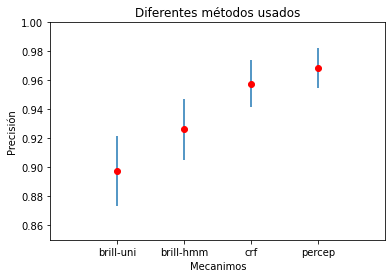

In [ ]:
# Corpus reducido barajado TnT, distintos tamaños de sufijos para palabras desconocidas
import matplotlib.pyplot as plt
import statistics
x = ['brill-uni', 'brill-hmm', 'crf','percep']
y = [resultadoBrillUni, resultadoBrillHmm, resultadoCRF, resultadoPerceptron]
errores = calcularErrores(y)
plt.axis([-1, 4, 0.85, 1])
plt.ylabel('Precisión')
plt.xlabel('Mecanimos')
plt.title('Diferentes métodos usados')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=errores,linestyle='None')
plt.show()

In [ ]:
print('Evaluación de prestaciones diferentes etiquetadores')
print('Etiquetador -               Precisión - Intervalo de confianza')
resultadosOtros = [resultadoBrillUni, resultadoBrillHmm, resultadoCRF, resultadoPerceptron]
nombres = ['Brill inicial Unigram', 'Brill inicial hmm', 'CRF', 'Perceptrón']
erroresOtros = calcularErrores(resultadosOtros)
for i in range(4):
  error = erroresOtros[i]
  print(nombres[i], '       ',round(resultadosOtros[i],3), '     (',round(resultadosOtros[i]-error,3) ,'-' ,round(resultadosOtros[i]+error,3),')')

Evaluación de prestaciones diferentes etiquetadores
Etiquetador -               Precisión - Intervalo de confianza
Brill inicial Unigram         0.897      ( 0.873 - 0.922 )
Brill inicial hmm         0.926      ( 0.905 - 0.947 )
CRF         0.958      ( 0.942 - 0.974 )
Perceptrón         0.968      ( 0.955 - 0.982 )
